# Two tracks

In [1]:
import jax.numpy as np
from jax import grad, jit, vmap, random, lax, jacfwd
from jax import lax
from jax.ops import index_update, index
import matplotlib.pyplot as plt
import numpy as onp

import utils
import metrics
import time
import plot
from svgd import SVGD

rkey = random.PRNGKey(0)

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
dist = metrics.Gaussian(0, 1)
dist = metrics.GaussianMixture([-2, 2], [8, 7], [1/3, 2/3])
n = 300
d = dist.d

n_steps = 200
svgd = SVGD(dist, n_steps, particle_shape=(n, d))
# svgd.initialize = lambda rkey: svgd.initialize(rkey) + 10

In [3]:
h = 1
lr = 1
svgd_stepsize = 0.01
bandwidth = h
ksd_bandwidth = 1

### train

In [4]:
# st = time.time()
# x_two, x_svgd, log_two, log_svgd, _ = svgd.train(rkey, h, lr, svgd_stepsize, n_steps, ksd_bandwidth, update_after=10**4)
# x_two.block_until_ready()
# end = time.time()
# print(f"took {end - st} seconds")

# plot.svgd_log(log_svgd)

# plot.svgd_log(log_two)

## SVGD twotrack

In [5]:
x, xest, log = svgd.svgd_twotrack(rkey, svgd_stepsize, bandwidth, n_steps)

JIT COMPILING svgd_twotrack...
...done compiling svgd_twotrack after 0.8185374736785889 seconds.


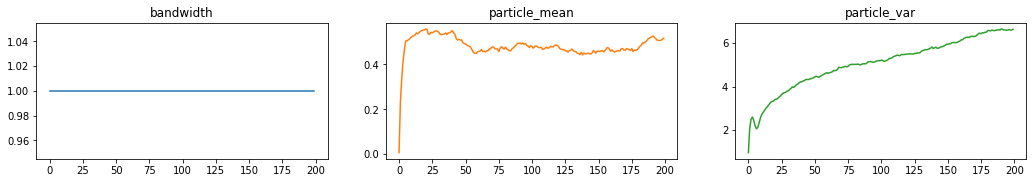

In [6]:
plot.svgd_log(log)

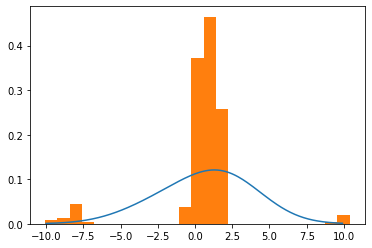

In [7]:
grid = np.arange(-10, 10, 0.1)

_ = plt.plot(grid, vmap(dist.pdf)(grid))
_ = plt.hist(x[:, 0], density=True, bins=25)

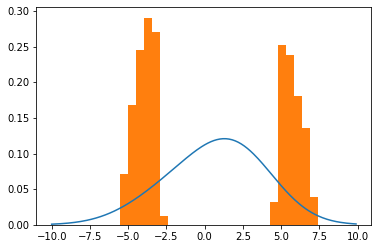

In [8]:
grid = np.arange(-10, 10, 0.1)

_ = plt.plot(grid, vmap(dist.pdf)(grid))
_ = plt.hist(xest[:, 0], density=True, bins=25)